In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [35]:
data = pd.read_csv('Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


ستون تاریخ را پیش پردازش کنید و مقدار سال را بدست آورید. سپس تعداد گل های مسی در هر سال را بر روی نمودار نمایش دهید

In [36]:
data['Date']=data['Date'].str[-4:]
df=data.value_counts('Date').reset_index()
df=df.sort_values(by='Date',ascending=True).reset_index()
df.head()

,index,Date,count
0,14,2005,3
1,13,2006,12
2,10,2007,31
3,11,2008,22
4,9,2009,41


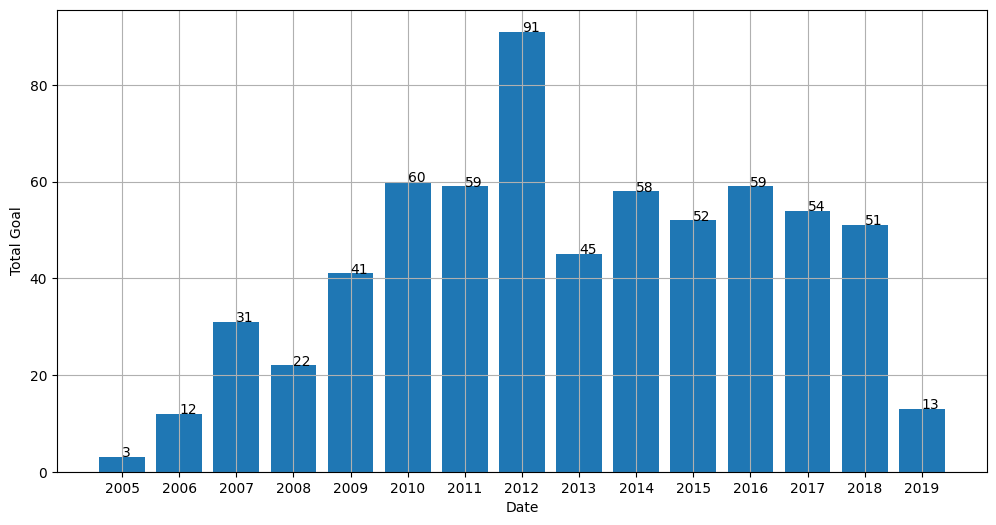

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(df["Date"], df["count"])
plt.xlabel('Date')
plt.ylabel('Total Goal')
for i in range(len(df)):
    plt.text(i, df['count'][i], df['count'][i])
plt.grid()
plt.show()

مسی اکثر پنالتی ها را با پای چپ زده است یا با پای راست؟ بر روی نمودار نمایش دهید

In [44]:
#data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
df=data.query('GoalType=="Penalty"')
df=df['Goal Method'].value_counts().reset_index()
df.loc[1]=['Right foot',0]
df

,Goal Method,count
0,Left foot,82
1,Right foot,0


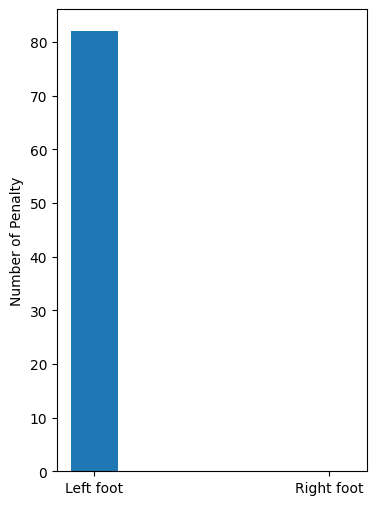

In [45]:
plt.figure(figsize=(4,6))
plt.bar(df['Goal Method'],df['count'],width = 0.2)
plt.ylabel('Number of Penalty')
plt.show()

percentage of games that messi team won when messis goal is in extra time

In [46]:
data['Minute']= data['Minute'].apply(eval)
data['Minute']= data['Minute'].astype(int)
df= data.query('Minute>89')
df= df['Final Game Result'].value_counts().reset_index()
df.head()

,Final Game Result,count
0,Won,35
1,Draw,3
2,Lost,2


In [47]:
df2=df.loc[df['Final Game Result'] == 'Won', 'count'].iloc[0]/df['count'].sum()
df['Percent']= df['count']/df['count'].sum()
print(f'percentage of games that messi team won when messis goal is in extra time: {df2}')
df.head()

percentage of games that messi team won when messis goal is in extra time: 0.875


,Final Game Result,count,Percent
0,Won,35,0.875
1,Draw,3,0.075
2,Lost,2,0.050


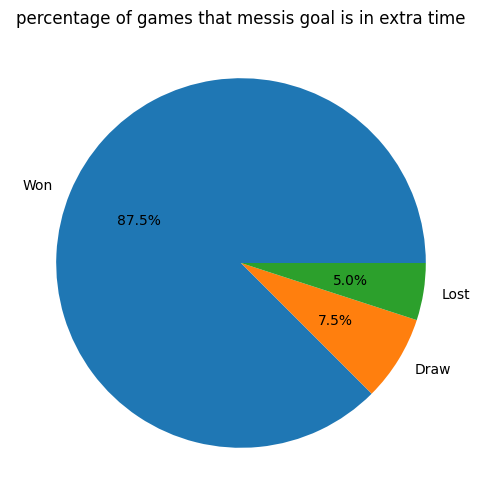

In [48]:
plt.figure(figsize=(6,6))
plt.pie(df['Percent'],labels=df['Final Game Result'],autopct='%1.1f%%')
plt.title("percentage of games that messis goal is in extra time")
plt.show()

چند درصد گل های مسی گل تساوی بوده است؟

In [49]:
data.head()
data.rename(columns = {'Home team':'Hometeam','Away team':'Awayteam','Score Away Team - When Messi Scored':'ScoreAwayTeamWhenMessiScored','Score Home Team - When Messi Scored':'ScoreHomeTeamWhenMessiScored'}, inplace = True)
equal_goal=np.where(data.ScoreHomeTeamWhenMessiScored ==  data.ScoreAwayTeamWhenMessiScored )

percent_goal=np.size(equal_goal)/len(data)
percent_goal=round(percent_goal, 3)
print(f'Percent of equal goal of messi: {percent_goal*100}%')

Percent of equal goal of messi: 8.6%


In [3]:
df = data['Goal Type'].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


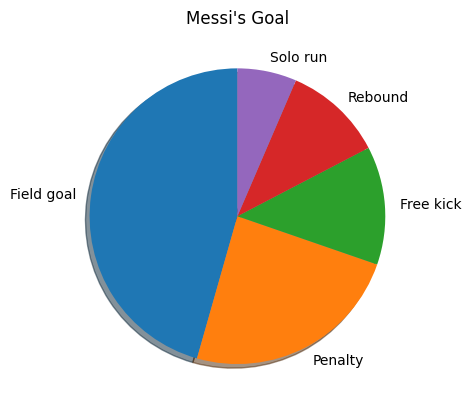

In [4]:
plt.pie(df['count'], labels=df['Goal Type'], shadow=True, startangle=90)
plt.title("Messi's Goal")
plt.show()

In [5]:
df = data['Goal Method'].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


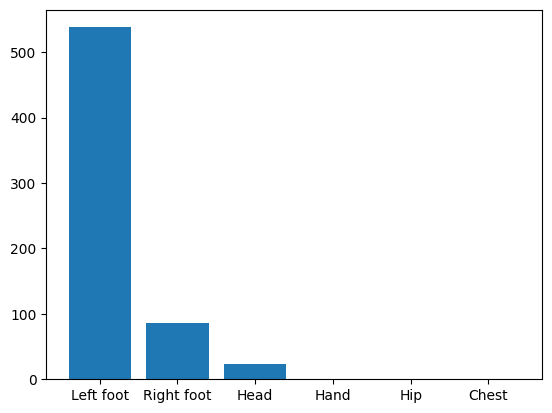

In [7]:
plt.bar(df['Goal Method'], df['count'])
plt.show()

In [23]:
data.isnull().sum()

Date                                     0
Competition Name                       122
Home team                                0
Opponent                                 0
Away team                                0
Minute                                   0
Score Home Team - When Messi Scored      0
Score Away Team - When Messi Scored      0
Goal Type                              311
Goal Method                              0
Final Game Result                        0
dtype: int64

In [ ]:
data['Minute']= data['Minute'].apply(eval)

In [15]:
data['Minute']= data['Minute'].astype(int)

In [16]:
df = data['Minute'].value_counts().reset_index().sort_values(by=['Minute'], ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


In [ ]:
plt.figure(figsize=(24, 8))
plt.plot(df['count'], df['Minute'])
plt.show()